In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle

In [2]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [3]:
#data = ert.load(dir+"res2dinv_inputs/amphibious_ERT_eastern_transect2_gps.Dat")
data = ert.load(dir+"res2dinv_inputs/transects_split_in_three/amphibious_ERT_eastern_transect_gps_center.dat")
data

29/11/24 - 11:35:51 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 27 data: 164, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

29/11/24 - 11:35:55 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
29/11/24 - 11:35:57 - pyGIMLi - INFO - Save RVector binary
29/11/24 - 11:35:57 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\7107516685755831498
29/11/24 - 11:35:57 - pyGIMLi - INFO - Save RVector binary
29/11/24 - 11:35:57 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\5525447937356186559


164 [35.86117514716747,...,33.13425572258969]

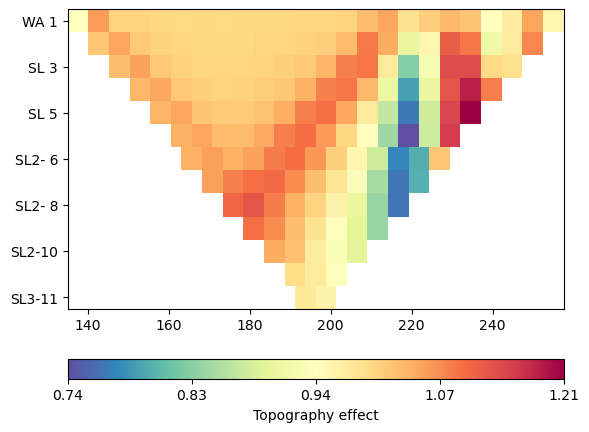

In [4]:
#data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')
data
data['k']

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x22c153462d0>)

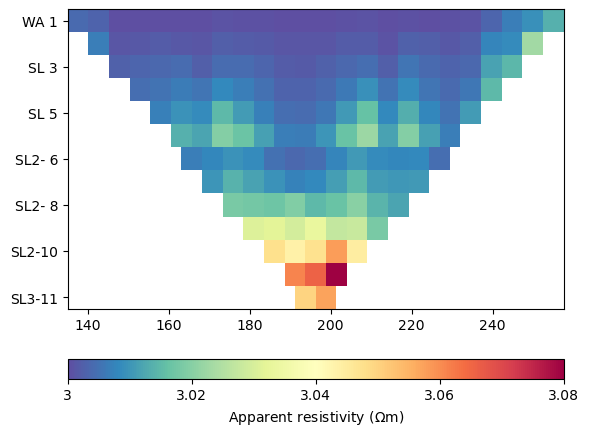

In [5]:
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x22c152ca7d0>)

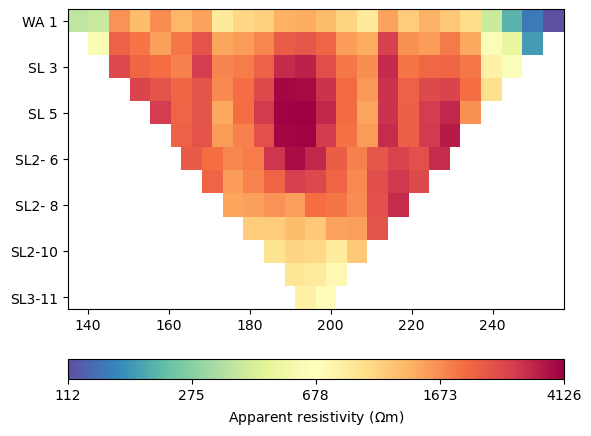

In [6]:
ert.showData(data)

29/11/24 - 11:36:12 - pyGIMLi - INFO - Found 2 regions.
29/11/24 - 11:36:12 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
29/11/24 - 11:36:12 - pyGIMLi - INFO - Found 2 regions.
29/11/24 - 11:36:12 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


29/11/24 - 11:36:12 - pyGIMLi - INFO - Creating forward mesh from region infos.
29/11/24 - 11:36:12 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
29/11/24 - 11:36:12 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1599 Cells: 2968 Boundaries: 2340
29/11/24 - 11:36:12 - pyGIMLi - INFO - Use median(data values)=1883.04395
29/11/24 - 11:36:12 - pyGIMLi - INFO - Created startmodel from forward operator: 525, min/max=1883.043950/1883.043950
29/11/24 - 11:36:12 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000022C112E7C40>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000022C1131B420>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000022C15294510>
min/max (data): 112/4126
min/max (error): 3%/3.08%
min/max (start model): 1883/1883
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  417.68
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  104.82 (dPhi = 74.27%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   15.32 (dPhi = 82.12%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    6.20 (dPhi = 45.82%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.92 (dPhi = 32.09%) lam: 

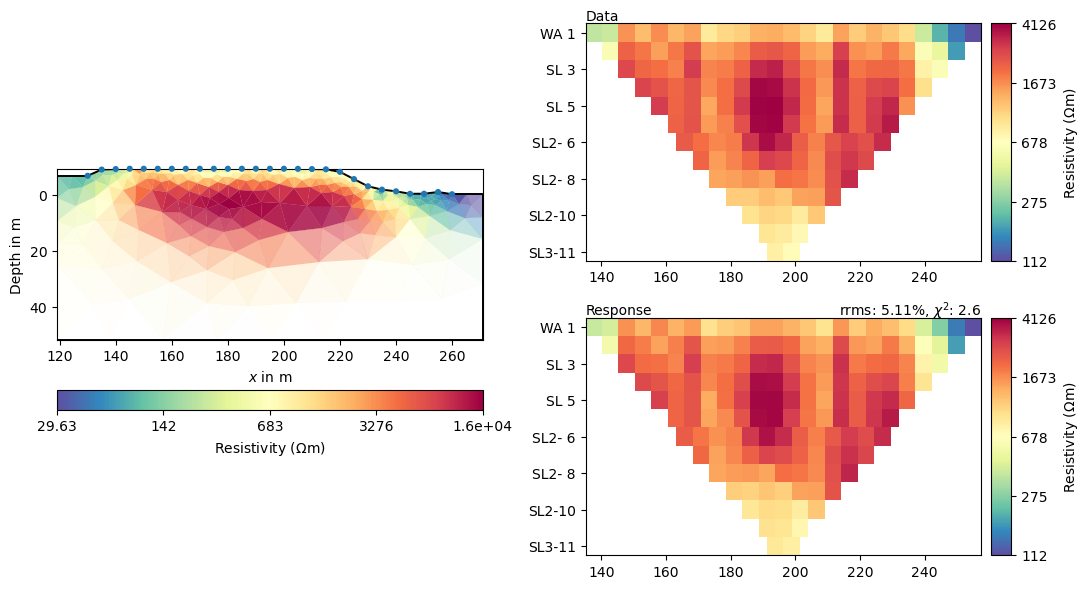

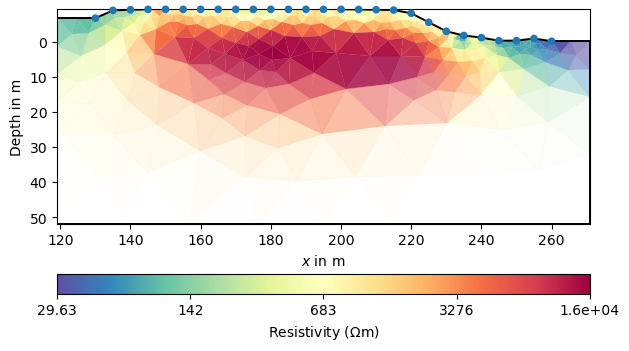

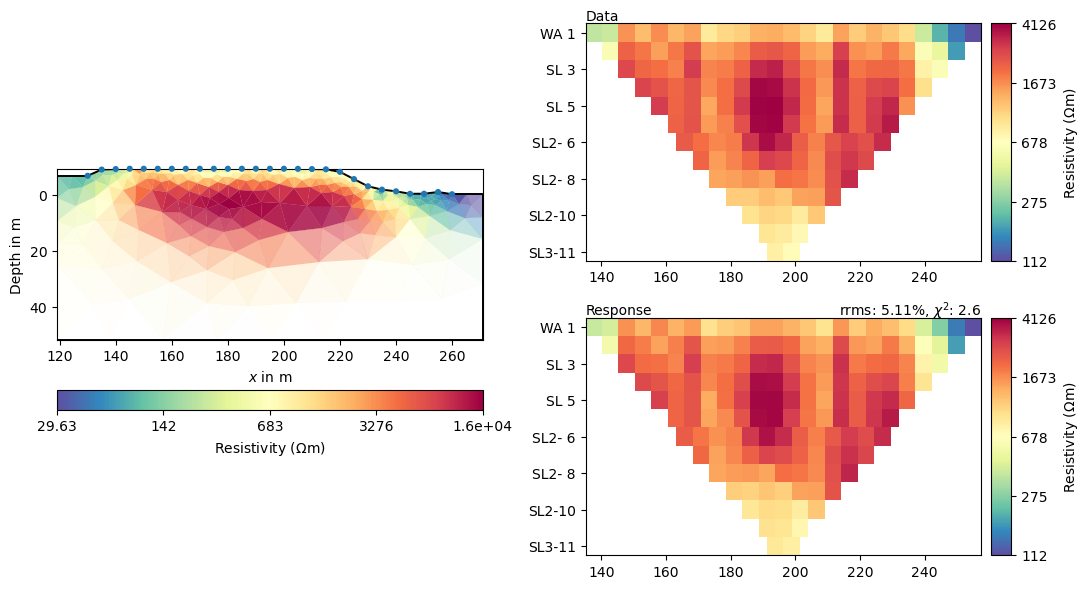

In [7]:
mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)

mgr.showResult()
mgr.showResultAndFit()

29/11/24 - 11:36:27 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_Eastern_centern\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_Eastern_centern\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_Eastern_centern\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

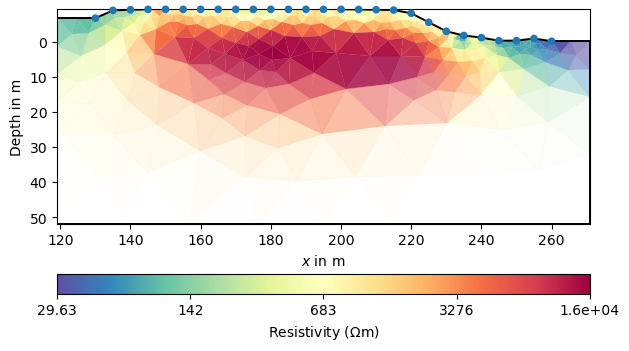

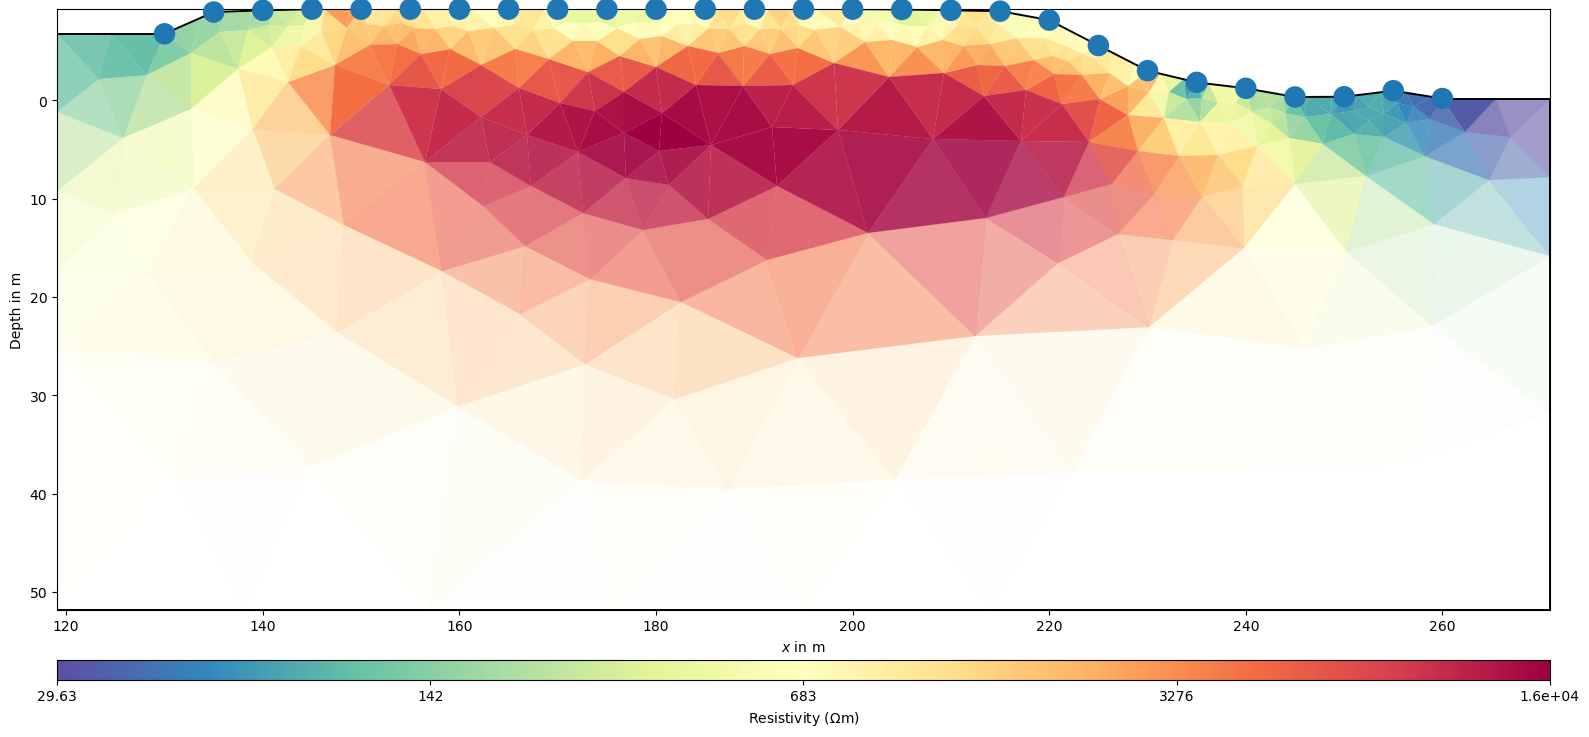

In [8]:
mgr.showResult()
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_Eastern_centern')